# Creating the database
Using the testing from testing_wine_api.ipynb, I'll create a small database of wine data to work with.

In [2]:
import requests
import json
import pandas as pd

In [3]:
def read_config(config_file):
    #read the API key from config.py
    creds={}
    with open(config_file) as file:
        exec(file.read(), creds)
    garbage = creds.pop('__builtins__')
    
    return creds

In the future, I will update get_wine_data to allow for more refined filters, but for now, I just want a little data to prototype with.

In [4]:
def get_wine_data(creds, num_results, offset):
    #the URL of the catalog API
    url_string = "http://services.wine.com/api/beta2/service.svc/json/catalog"

    #a dictionary of query arguments
    #categories 490 narrows it down to single bottles of wine
    payload = {'size': str(num_results), 'apikey': creds['KEY'], 'filter': 'categories(490)', 'offset': str(offset)}

    #make the GET request
    r= requests.get(url_string, params=payload)

    #load the data
    data_all = json.loads(r.text)
    
    return data_all['Products']['List']

In [5]:
def parse_wine_data(data):
    main_wines = []
    varietals = []
    wine_types = []
    appellations = []
    regions = []
    vineyards = []

    #the categories have to be hard coded
    for item in data:
        #names of the relevant pieces of data
        col_list = ["item['Id']",
                    "item['Name']",
                    "item['Vintage']",
                    "item['Ratings']['HighestScore']",
                    "item['Vineyard']['Id']",
                    "item['Varietal']['Id']",
                    "item['Varietal']['WineType']['Id']",
                    "item['Appellation']['Id']",
                    "item['Appellation']['Region']['Id']",
                    "item['Community']['Reviews']['Url']"]
        
        wine = []
        for name in col_list:
            try: #try to append the data
                wine.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                wine.append(None)

        #append to main_wine
        main_wines.append(wine)
        
        #get the data for varietals
        col_list = ["item['Varietal']['Id']",
                    "item['Varietal']['Name']",
                    "item['Varietal']['Url']"]
        
        varietal = []
        for name in col_list:
            try: #try to append the data
                varietal.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                varietal.append(None)

        #append to varietals
        varietals.append(varietal)

        #get the data for wine_types
        col_list = ["item['Varietal']['WineType']['Id']",
                    "item['Varietal']['WineType']['Name']",
                    "item['Varietal']['WineType']['Url']"]
        
        wine_type = []
        for name in col_list:
            try: #try to append the data
                wine_type.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                wine_type.append(None)

        #append to wine_types
        wine_types.append(wine_type)

        #get the data for appellations
        col_list = ["item['Appellation']['Id']",
                    "item['Appellation']['Name']"]
        
        appellation = []
        for name in col_list:
            try: #try to append the data
                appellation.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                appellation.append(None)

        #append to appellations
        appellations.append(appellation)

        #get the data for regions
        col_list = ["item['Appellation']['Region']['Id']",
                    "item['Appellation']['Region']['Name']"]
        
        region = []
        for name in col_list:
            try: #try to append the data
                region.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                region.append(None)

        #append to regions
        regions.append(region)

        #get the data for vineyards
        col_list = ["item['Vineyard']['Id']", "item['Vineyard']['Name']"]
        
        vineyard = []
        for name in col_list:
            try: #try to append the data
                vineyard.append(eval(name))
            except TypeError: #if the value is None, fill the list with None
                vineyard.append(None)

        #append to vineyards
        vineyards.append(vineyard)
        
    return main_wines, varietals, wine_types, appellations, regions, vineyards

In [6]:
def create_dfs(main_wines, varietals, wine_types, appellations, regions, vineyards):
    #column names have to be hard coded
    
    #main_wines
    main_wines_cols = ['Wine ID',
                       'Wine name',
                       'Vintage',
                       'Score',
                       'Vineyard ID',
                       'Varietal ID',
                       'Wine Type ID',
                       'Appellation ID',
                       'Region ID',
                       'Reviews URL']
    
    main_wines_db = pd.DataFrame(main_wines, columns=main_wines_cols)
    main_wines_db = main_wines_db.drop_duplicates()
    
    
    #varietals
    varietals_cols = ['Varietal ID', 'Varietal Name', 'Varietal URL']
    
    varietals_db = pd.DataFrame(varietals, columns=varietals_cols)
    varietals_db = varietals_db.drop_duplicates()
    
    
    #wine_types
    wine_types_cols = ['Wine Type ID', 'Wine Type Name', 'Wine Type URL']
    
    wine_types_db = pd.DataFrame(wine_types, columns=wine_types_cols)
    wine_types_db = wine_types_db.drop_duplicates()
    
    #appellations
    appellations_cols = ['Appellation ID', 'Appellation Name']
    
    appellations_db = pd.DataFrame(appellations, columns=appellations_cols)
    appellations_db = appellations_db.drop_duplicates()
    
    #regions
    regions_cols = ['Region ID', 'Region Name']
    
    regions_db = pd.DataFrame(regions, columns=regions_cols)
    regions_db = regions_db.drop_duplicates()
    
    #vineyards
    vineyards_cols = ['Vineyard ID', 'Vineyard Name']
    
    vineyards_db = pd.DataFrame(vineyards, columns=vineyards_cols)
    vineyards_db = vineyards_db.drop_duplicates()
    
    return main_wines_db, varietals_db, wine_types_db, appellations_db, regions_db, vineyards_db

In [7]:
creds = read_config('config.py')

In [44]:
data = get_wine_data(creds, 1000)

Looks like I can only get 1000 results at a time. I will have to take that into account.

In [45]:
url_string = "http://services.wine.com/api/beta2/service.svc/json/catalog"

In [96]:
payload = {'size': '1000', 'offset': '1', 'apikey': creds['KEY'], 'filter': 'categories(490)'}

In [97]:
r= requests.get(url_string, params=payload)

In [98]:
data_temp = json.loads(r.text)

In [99]:
data2 = data_temp['Products']['List']

In [100]:
main_wines, varietals, wine_types, appellations, regions, vineyards = parse_wine_data(data)

In [101]:
main_wines_db, varietals_db, wine_types_db, appellations_db, regions_db, vineyards_db = create_dfs(main_wines, varietals, wine_types, appellations, regions, vineyards)

In [102]:
main_wines_db

,Wine ID,Wine name,Vintage,Score,Vineyard ID,Varietal ID,Wine Type ID,Appellation ID,Region ID,Reviews URL
0,129743,Frescobaldi Castelgiocondo Brunello di Montalc...,2009,94,8894,163,124,2452,105,http://www.wine.com/v6/Frescobaldi-Castelgioco...
1,155473,Trivento Malbec Reserve 2015,2015,95,7031,10079,124,2089,112,http://www.wine.com/v6/Trivento-Malbec-Reserve...
2,137441,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2013,92,8754,139,124,2398,101,http://www.wine.com/v6/Stags-Leap-Wine-Cellars...
3,162763,Mouton Cadet Ryder Cup Selection 2014,2014,89,7968,144,124,2263,10038,http://www.wine.com/v6/Mouton-Cadet-Ryder-Cup-...
4,151858,Dom Perignon Limited Edition Gift Box by Bjork...,2006,97,8757,142,123,2331,102,http://www.wine.com/v6/Dom-Perignon-Limited-Ed...
5,156234,Columbia Crest Grand Estates Cabernet Sauvigno...,2014,91,8853,139,124,2414,104,http://www.wine.com/v6/Columbia-Crest-Grand-Es...
6,152598,Leese-Fitch Cabernet Sauvignon 2014,2014,91,999998288,139,124,2388,101,http://www.wine.com/v6/Leese-Fitch-Cabernet-Sa...
7,154526,Antinori Villa Toscana 2013,2013,91,8966,145,124,2452,105,http://www.wine.com/v6/Antinori-Villa-Toscana-...
8,12927,Nicolas Feuillatte Brut Reserve,Non-Vintage,90,8463,182,123,2331,102,http://www.wine.com/v6/Nicolas-Feuillatte-Brut...
9,6138,Laurent-Perrier Brut,Non-Vintage,91,6071,182,123,2331,102,http://www.wine.com/v6/Laurent-Perrier-Brut/wi...


In [72]:
main_wines2, varietals2, wine_types2, appellations2, regions2, vineyards2 = parse_wine_data(data2)

In [73]:
main_wines2_db, varietals2_db, wine_types2_db, appellations2_db, regions2_db, vineyards2_db = create_dfs(main_wines2, varietals2, wine_types2, appellations2, regions2, vineyards2)

In [74]:
main_wines2_db

,Wine ID,Wine name,Vintage,Score,Vineyard ID,Varietal ID,Wine Type ID,Appellation ID,Region ID,Reviews URL
0,149017,Toscolo Chianti (3 Liter Bottle) 2013,2013,0,7741,163,124,2452,105,http://www.wine.com/v6/Toscolo-Chianti-3-Liter...
1,8003,Laurent-Perrier Grand Siecle,Non-Vintage,97,6071,182,123,2331,102,http://www.wine.com/v6/Laurent-Perrier-Grand-S...
2,156098,Chateau Vignot Saint-Emilion Grand Cru 2009,2009,0,5924,144,124,10042,10038,http://www.wine.com/v6/Chateau-Vignot-Saint-Em...
3,150539,Trefethen Estate Chardonnay 2014,2014,90,8748,140,125,2398,101,http://www.wine.com/v6/Trefethen-Estate-Chardo...
4,141014,Chatter Creek Merlot 2010,2010,0,999996411,138,124,2052,104,http://www.wine.com/v6/Chatter-Creek-Merlot-20...
5,135340,The Doctors' Sauvignon Blanc 2013,2013,90,999995987,151,125,2273,114,http://www.wine.com/v6/The-Doctors-Sauvignon-B...
6,147804,The White Knight Viognier 2014,2014,90,999996815,162,125,2388,101,http://www.wine.com/v6/The-White-Knight-Viogni...
7,1593,Harveys Bristol Cream Sherry,Non-Vintage,0,8574,157,128,9065,109,http://www.wine.com/v6/Harveys-Bristol-Cream-S...
8,96222,Chateau Troplong Mondot 2005,2005,100,7765,144,124,10042,10038,http://www.wine.com/v6/Chateau-Troplong-Mondot...
9,159148,Aldo Conterno Conca Tre Pile Barbera d'Alba 2012,2012,90,7326,172,124,2431,105,http://www.wine.com/v6/Aldo-Conterno-Conca-Tre...


In [8]:
data = get_wine_data(creds, 1000, 1)

In [9]:
main_wines, varietals, wine_types, appellations, regions, vineyards = parse_wine_data(data)

In [10]:
main_wines_db, varietals_db, wine_types_db, appellations_db, regions_db, vineyards_db = create_dfs(main_wines, varietals, wine_types, appellations, regions, vineyards)

In [11]:
wine_types_db

,Wine Type ID,Wine Type Name,Wine Type URL
0,124,Red Wines,http://www.wine.com/v6/Red-Wines/wine/list.asp...
3,123,Champagne & Sparkling,http://www.wine.com/v6/Champagne-and-Sparkling...
10,125,White Wines,http://www.wine.com/v6/White-Wines/wine/list.a...
77,126,Rosé Wine,http://www.wine.com/v6/Rose-Wine/wine/list.asp...
171,128,"Dessert, Fortified & Fruit Wines",http://www.wine.com/v6/Dessert-Fortified-and-F...


# Cleaning the data a bit
I notices some values that looked like garbage values, so I'm going to clean the data a bit.

In [12]:
import numpy as np

There is a large negative varietal ID that needs to be dealt with. It looks like some of the corresponding Names match real varietals, so I should take a look at the wines.

In [14]:
main_wines_db[main_wines_db['Varietal ID'] < 0]

,Wine ID,Wine name,Vintage,Score,Vineyard ID,Varietal ID,Wine Type ID,Appellation ID,Region ID,Reviews URL
77,153085,Miraval Rose 2015,2015,91,999997781,-2147483648,126,10064,102,http://www.wine.com/v6/Miraval-Rose-2015/wine/...
188,159718,Chateau d'Esclans Garrus Rose 2014,2014,98,999998681,-2147483648,126,10064,102,http://www.wine.com/v6/Chateau-dEsclans-Garrus...
315,152371,Chateau d'Esclans Whispering Angel Rose 2015,2015,93,999998681,-2147483648,126,10064,102,http://www.wine.com/v6/Chateau-dEsclans-Whispe...
321,154327,Aix Rose 2015,2015,90,999997278,-2147483648,126,10064,102,http://www.wine.com/v6/Aix-Rose-2015/wine/1543...
624,155684,Commanderie de la Bargemone Coteaux d'Aix en P...,2015,91,999999632,-2147483648,126,10064,102,http://www.wine.com/v6/Commanderie-de-la-Barge...
629,157000,Domaines Ott Chateau de Selle Cotes de Provenc...,2015,92,5981,-2147483648,126,10064,102,http://www.wine.com/v6/Domaines-Ott-Chateau-de...
710,156068,Minuty M Rose 2015,2015,0,999996396,-2147483648,126,10064,102,http://www.wine.com/v6/Minuty-M-Rose-2015/wine...
748,143297,Domaine de la Mordoree Cotes Du Rhone La Dame ...,2014,92,999998600,-2147483648,126,10061,10039,http://www.wine.com/v6/Domaine-de-la-Mordoree-...
835,141174,Guigal Cotes du Rhone Rose 2014,2014,90,8657,-2147483648,126,10061,10039,http://www.wine.com/v6/Guigal-Cotes-du-Rhone-R...
911,160121,Chateau D'Aqueria Tavel Rose 2015,2015,95,5653,-2147483648,126,10058,10039,http://www.wine.com/v6/Chateau-DAqueria-Tavel-...


In [15]:
varietals_db

,Varietal ID,Varietal Name,Varietal URL
0,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...
1,139,Cabernet Sauvignon,http://www.wine.com/v6/Cabernet-Sauvignon/wine...
3,142,Vintage,http://www.wine.com/v6/Vintage/wine/list.aspx?...
5,145,Other Red Blends,http://www.wine.com/v6/Other-Red-Blends/wine/l...
6,182,Non-Vintage,http://www.wine.com/v6/Non-Vintage/wine/list.a...
7,144,Bordeaux Red Blends,http://www.wine.com/v6/Bordeaux-Red-Blends/win...
9,163,Sangiovese,http://www.wine.com/v6/Sangiovese/wine/list.as...
10,140,Chardonnay,http://www.wine.com/v6/Chardonnay/wine/list.as...
13,147,Rosé,http://www.wine.com/v6/Rose/wine/list.aspx?N=7...
22,146,Syrah/Shiraz,http://www.wine.com/v6/SyrahShiraz/wine/list.a...


I will just delete these for now and create a fix later if I need to.

In [16]:
main_wines_clean_db = main_wines_db[main_wines_db['Varietal ID'] >= 0]

In [17]:
main_wines_clean_db.shape

(989, 10)

In [18]:
varietals_clean_db = varietals_db[varietals_db['Varietal ID'] >= 0]

In [19]:
wine_types_db

,Wine Type ID,Wine Type Name,Wine Type URL
0,124,Red Wines,http://www.wine.com/v6/Red-Wines/wine/list.asp...
3,123,Champagne & Sparkling,http://www.wine.com/v6/Champagne-and-Sparkling...
10,125,White Wines,http://www.wine.com/v6/White-Wines/wine/list.a...
77,126,Rosé Wine,http://www.wine.com/v6/Rose-Wine/wine/list.asp...
171,128,"Dessert, Fortified & Fruit Wines",http://www.wine.com/v6/Dessert-Fortified-and-F...


In [21]:
appellations_db

,Appellation ID,Appellation Name
0,2089,Argentina
1,2398,Napa Valley
2,2414,Columbia Valley
3,2331,Champagne
4,2388,Other California
5,2452,Tuscany
7,2263,Other Bordeaux
10,2454,Carneros
11,2405,Other Australia
16,2428,Chile


More negatives. Just going to get rid of for now.

In [22]:
appellations_clean_db = appellations_db[appellations_db['Appellation ID'] >= 0]

In [23]:
regions_db

,Region ID,Region Name
0,112,South America
1,101,California
2,104,Washington
3,102,France - Other regions
5,105,Italy
7,10038,France - Bordeaux
11,108,Australia
28,103,Oregon
49,109,Spain
61,114,New Zealand


In [24]:
regions_clean_db = regions_db[regions_db['Region ID'] >= 0]

In [25]:
vineyards_db

,Vineyard ID,Vineyard Name
0,7031,Trivento
1,8754,Stag's Leap Wine Cellars
2,8853,Columbia Crest
3,8757,Dom Perignon
4,999998288,Leese-Fitch
5,8966,Antinori
6,8463,Champagne Nicolas Feuillatte
7,7968,Mouton Cadet
8,6071,Laurent Perrier
10,8337,Rombauer Vineyards


In [26]:
vineyards_db[vineyards_db.duplicated('Vineyard Name', keep=False) == 1]

,Vineyard ID,Vineyard Name


In [27]:
vineyards_db[vineyards_db['Vineyard ID'] < 0]

,Vineyard ID,Vineyard Name


The main wines also had ratings of 0 in the Score column. I checked the ratings page, and this means that there is no rating. I'm going to replace these with numpy.nan. I can always use df.fillna() to reverse it.

In [29]:
row_index = main_wines_clean_db[main_wines_clean_db.Score == 0].index.tolist()

In [30]:
main_wines_clean_db.loc[row_index, 'Score'] = np.nan

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
main_wines_clean_db[main_wines_clean_db['Score'].isnull()]

,Wine ID,Wine name,Vintage,Score,Vineyard ID,Varietal ID,Wine Type ID,Appellation ID,Region ID,Reviews URL
46,163145,The Prisoner Wine Company The Prisoner 2015,2015,NaN,999997499,145,124,2398,101,http://www.wine.com/v6/The-Prisoner-Wine-Compa...
87,152437,Roots Run Deep Educated Guess Cabernet Sauvign...,2014,NaN,999999478,139,124,2398,101,http://www.wine.com/v6/Roots-Run-Deep-Educated...
98,158956,Caymus Napa Valley Cabernet Sauvignon (1 Liter...,2014,NaN,8626,139,124,2398,101,http://www.wine.com/v6/Caymus-Napa-Valley-Cabe...
102,151599,Miura Vineyards Silacci Vineyard Pinot Noir 2010,2010,NaN,5370,143,124,2462,101,http://www.wine.com/v6/Miura-Vineyards-Silacci...
110,140224,La Marca Prosecco (187ML Split),Non-Vintage,NaN,5575,182,123,2352,105,http://www.wine.com/v6/La-Marca-Prosecco-187ML...
111,128618,Lucky Proprietary Red Blend,Non-Vintage,NaN,999997909,145,124,2416,101,http://www.wine.com/v6/Lucky-Proprietary-Red-B...
128,155885,Noiro Pinot Noir 2013,2013,NaN,999996570,143,124,2388,101,http://www.wine.com/v6/Noiro-Pinot-Noir-2013/w...
134,78020,Francis Ford Coppola Sofia Mini Blanc de Blanc...,Non-Vintage,NaN,999997855,182,123,2462,101,http://www.wine.com/v6/Francis-Ford-Coppola-So...
141,159736,Veuve Clicquot Vintage Brut 2008,2008,NaN,8871,142,123,2331,102,http://www.wine.com/v6/Veuve-Clicquot-Vintage-...
166,163903,Atlas Peak Napa Valley Cabernet Sauvignon 2014,2014,NaN,8575,139,124,2398,101,http://www.wine.com/v6/Atlas-Peak-Napa-Valley-...


# Exploring the data
Since I can't get access to the ratings easily, yet, I will use what I've got to make some interesting conclusions and pick the best ones to display.

In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
import matplotlib

In [39]:
main_wines_with_names = varietals_clean_db.merge(main_wines_clean_db, how='right', on='Varietal ID')

In [40]:
main_wines_with_names = regions_clean_db.merge(main_wines_with_names, how='right', on='Region ID')

In [41]:
main_wines_with_names

,Region ID,Region Name,Varietal ID,Varietal Name,Varietal URL,Wine ID,Wine name,Vintage,Score,Vineyard ID,Wine Type ID,Appellation ID,Reviews URL
0,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,155473,Trivento Malbec Reserve 2015,2015,95.0,7031,124,2089,http://www.wine.com/v6/Trivento-Malbec-Reserve...
1,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,154620,Sur de los Andes Malbec Reserva 2012,2012,90.0,999998208,124,2089,http://www.wine.com/v6/Sur-de-los-Andes-Malbec...
2,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,160077,Mendel Unus 2011,2011,93.0,999999704,124,2089,http://www.wine.com/v6/Mendel-Unus-2011/wine/1...
3,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,153131,Luigi Bosca Malbec 2013,2013,92.0,6084,124,2089,http://www.wine.com/v6/Luigi-Bosca-Malbec-2013...
4,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,149722,Marcelo Pelleriti Reserve Malbec 2012,2012,93.0,999995410,124,2089,http://www.wine.com/v6/Marcelo-Pelleriti-Reser...
5,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,148629,Luca Malbec 2013,2013,93.0,8095,124,2089,http://www.wine.com/v6/Luca-Malbec-2013/wine/1...
6,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,155423,Bodega Noemia de Patagonia Rio Negro Valley Ma...,2013,98.0,999999319,124,2089,http://www.wine.com/v6/Bodega-Noemia-de-Patago...
7,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,158750,Alamos Malbec 2015,2015,NaN,8304,124,2089,http://www.wine.com/v6/Alamos-Malbec-2015/wine...
8,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,154621,Sur de los Andes Malbec Cabernet Sauvignon Pre...,2010,91.0,999998208,124,2089,http://www.wine.com/v6/Sur-de-los-Andes-Malbec...
9,1.120000e+02,South America,10079,Malbec,http://www.wine.com/v6/Malbec/wine/list.aspx?N...,144352,Catena Malbec 2013,2013,91.0,8363,124,2089,http://www.wine.com/v6/Catena-Malbec-2013/wine...


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]), <a list of 37 Text xticklabel objects>)

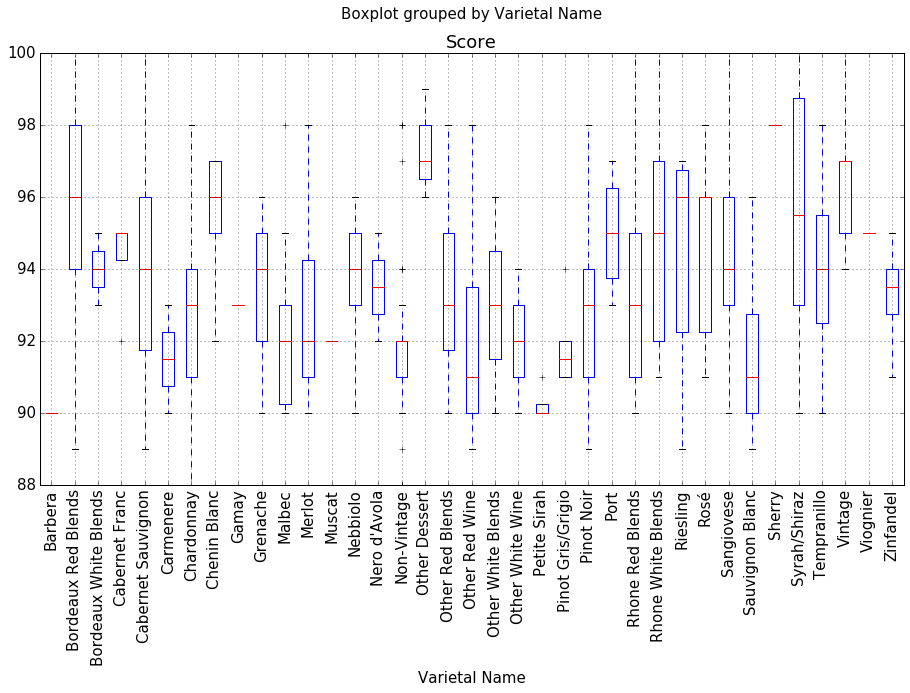

In [42]:
matplotlib.rcParams.update({'font.size': 15})
ax = main_wines_with_names.boxplot(column='Score', by='Varietal Name', figsize=(15,8))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

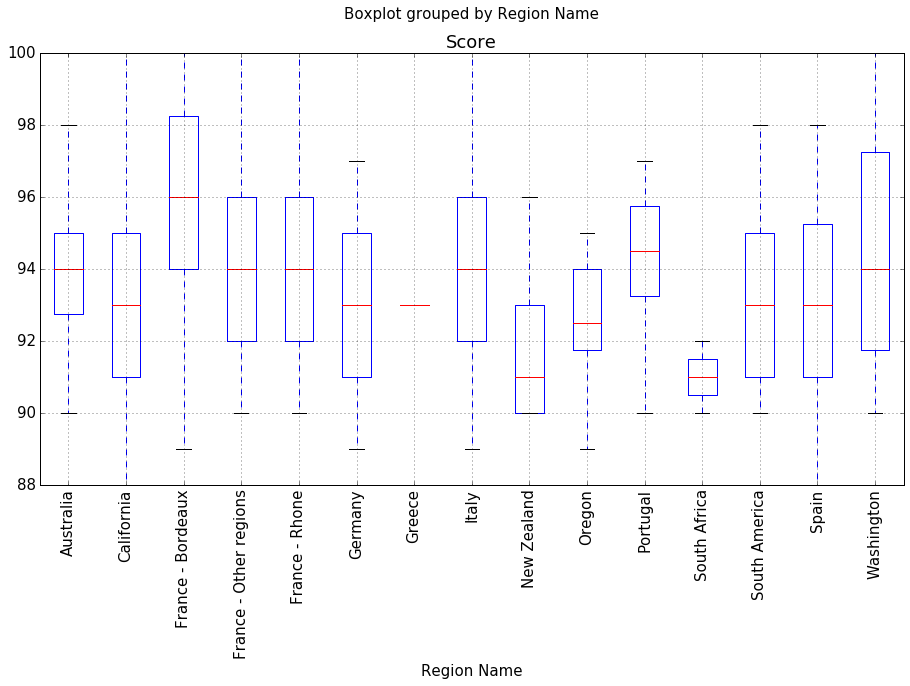

In [43]:
matplotlib.rcParams.update({'font.size': 15})
ax = main_wines_with_names.boxplot(column='Score', by='Region Name', figsize=(15,8))
plt.xticks(rotation=90)